In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

model = tf.keras.Sequential()
for layer in tf.keras.applications.VGG19(include_top = False, input_shape=(32,32,3)).layers:
    model.add(layer)

#for layer in model.layers:
#    layer.trainable = False

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.summary()

170508288/170498071 [==============================] - 7s 0us/step


2022-10-24 08:59:12.269060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 08:59:12.396347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 08:59:12.397491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 08:59:12.400485: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________

In [3]:
# train
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=1024)

2022-10-24 08:59:17.066479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-24 08:59:18.945203: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


49/49 [==============================] - 27s 323ms/step - loss: 4.1470 - accuracy: 0.1283 - val_loss: 2.2470 - val_accuracy: 0.1195
Epoch 2/50
49/49 [==============================] - 11s 218ms/step - loss: 2.0796 - accuracy: 0.1845 - val_loss: 1.9583 - val_accuracy: 0.1901
Epoch 3/50
49/49 [==============================] - 11s 218ms/step - loss: 1.8993 - accuracy: 0.2207 - val_loss: 1.8525 - val_accuracy: 0.2331
Epoch 4/50
49/49 [==============================] - 11s 218ms/step - loss: 1.8460 - accuracy: 0.2395 - val_loss: 1.8138 - val_accuracy: 0.2450
Epoch 5/50
49/49 [==============================] - 11s 218ms/step - loss: 1.8234 - accuracy: 0.2500 - val_loss: 1.7945 - val_accuracy: 0.2517
Epoch 6/50
49/49 [==============================] - 11s 217ms/step - loss: 1.7761 - accuracy: 0.2674 - val_loss: 1.7341 - val_accuracy: 0.2793
Epoch 7/50
49/49 [==============================] - 11s 218ms/step - loss: 1.7430 - accuracy: 0.2879 - val_loss: 1.6963 - val_accuracy: 0.3005
Epoch 8/50

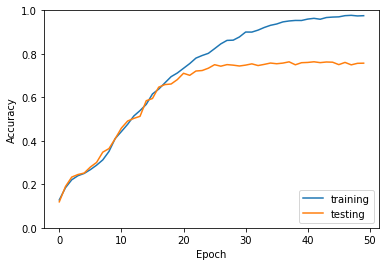

In [4]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label = 'testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

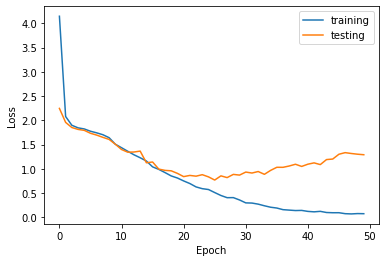

In [5]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [6]:
model.save("vgg19")

2022-10-24 09:08:28.854140: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
